### Задание 1. Динамика и второй закон Ньютона

In [4]:
from sympy import *

In [2]:
t, m= symbols("t m")
v = Function("v")
x = Function("x")

de1 = Eq(1600*diff(v(t), t), -8*(v(t)*v(t)))
de1

Eq(1600*Derivative(v(t), t), -8*v(t)**2)

In [25]:
Vt_ = dsolve(de1, v(t), ics={v(0): 30})
Vt_

Eq(v(t), 200/(t + 20/3))

In [31]:
v_30 = Vt_.subs({t:30})
v_30

# 1. Скорость автомобиля через  30  секунд.

Eq(v(30), 60/11)

In [41]:
t3 = solve(Eq(Vt_.rhs, 3), t) 
t3[0]

# 2. Время, которое пройдет прежде чем скорость автомобиля станет  3  м/сек.

60

In [38]:
de2 = Eq(diff(x(t), t), Vt_.rhs)
de2

Eq(Derivative(x(t), t), 200/(t + 20/3))

In [44]:
Xt = dsolve(de2, x(t), ics={x(0): 0})
Xt

Eq(x(t), 200*log(3*t + 20) - 200*log(20))

In [45]:
x_3 = Xt.subs({t:t3[0]})
x_3

# 3. Расстояние, которое пройдет автомобиль прежде чем его скорость станет  3  м/сек.

Eq(x(60), -200*log(20) + 200*log(200))

### Автомобиль движется прямолинейно со скоростью 40 км/ч. На полном ходу двигатель автомобиля останавливается и через 40 секунд после этого скорость автомобиля уменьшается до 20 км/ч. Сопротивление воздуха пропорционально скорости движения автомобиля. Коэффициент сопротивления k и масса автомобиля m неизвестны. Определите скорость автомобиля через 4 минуты после остановки двигателя. Постройте график изменения скорости в зависимости от времени для первых 6 минут после остановки двигателя.

In [8]:
t, m, k= symbols("t m k")
v = Function("v")
x = Function("x")

de1 = Eq(m*diff(v(t), t), -k*(v(t)))
de1

Eq(m*Derivative(v(t), t), -k*v(t))

In [13]:
Vt_ = dsolve(de1, v(t), ics={v(0): 40000/3600})
Vt_

Eq(v(t), 11.1111111111111*exp(-k*t/m))

In [25]:
solve(Eq(Vt_.rhs, 20000/3600).subs({t:40}), m)[0]
# Нашли уравнение на m и k

57.7078016355585*k

In [21]:
Vt_.subs({t:240})
# Скорость спустя 4 минуты

Eq(v(240), 11.1111111111111*exp(-240*k/m))

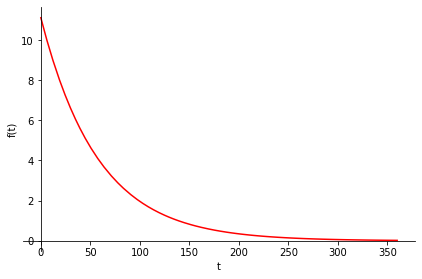

In [27]:
Vt_res = Vt_.subs({k:10, m:57.7078016355585*10})
Vplot = plot(Vt_res.rhs, (t, 0, 360), line_color='red')

### Задание 2. Модель Мальтуса

In [48]:
t, k, x0 = symbols("t k x0")
x = Function("x")

de1 = Eq(diff(x(t), t), k*x())
de1

Eq(Derivative(x(t), t), k*x())

In [50]:
Xt1 = dsolve(de1, x(t), ics={x(2000): 6*10**9})
Xt1

Eq(x(t), k*t*x() - 2000*k*x() + 6000000000)

In [51]:
Xt2 = dsolve(de1, x(t), ics={x(-8000): 5*10**6})
Xt2

Eq(x(t), k*t*x() + 8000*k*x() + 5000000)

### В течение месяца популяция хомячков удвоилась. С момента наблюдения популяция увеличивается по закону Мальтуса. Считая, что в месяце 30 дней за сколько дней популяция хомячков утроится?

In [7]:
t, k, x0 = symbols("t k x0")
x = Function("x")

de1 = Eq(x0*exp(30*24*k), 2*x0)
de1

Eq(x0*exp(720*k), 2*x0*log(2))

In [20]:
K = solve(Eq(720*k, ln(2)), k)[0]
K

log(2)/720

In [17]:
pop = Eq(x(t), x0*exp(K*t))
pop

Eq(x(t), x0*exp(t*log(2)/720))

In [21]:
pop3 = Eq(3*x0, x0*exp(K*t))
pop3

Eq(3*x0, x0*exp(t*log(2)/720))

In [24]:
time3 = solve(Eq(ln(3), t*K), t)[0]
time3

720*log(3)/log(2)

### Ответ: 48 дней